### **Problem Description**
Please modify the learning algorithm code in the class and report the bias and variance.

### **Student ID**
Please fill in your student IDs below. 

In [ ]:
student_id = 'r10521804' # fill with your student ID

assert student_id != 'your_student_id', 'Please fill in your student_id before you start.'

In [ ]:
import numpy as np
from scipy import stats
def gen_sindata(n=2):
    x = stats.uniform(-1,2) # define random variable
    v = x.rvs((n,1)) # generate sample
    y = np.sin(np.pi*v) # use sample for sine
    return (v,y)

In [ ]:
#from sklearn.linear_model import LinearRegression
#lr = LinearRegression(fit_intercept=False)
X, y = gen_sindata(2)
b = sum(y)/2
X,y,b
#line = plt.hlines(y=b, xmin=-1, xmax=1)
#lr.fit(X,y)
#lr.coef_

(array([[ 0.24557017],
        [-0.3526903 ]]), array([[ 0.69719802],
        [-0.8948117 ]]), array([-0.09880684]))

Text(0.5, 1.0, '$b=-0.0988$')

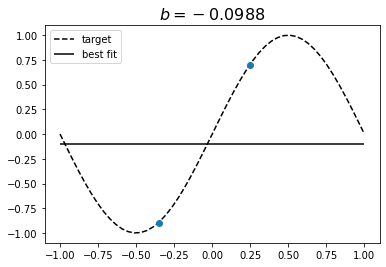

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
xi= np.linspace(-1,1,50)
yi= np.sin(np.pi*xi)
#y_pred = lr.predict(xi.reshape(-1,1))

plt.plot(xi, yi,'--k',label='target')
plt.plot(X, y, 'o')
plt.hlines(b, xmin=-1, xmax=1, label='best fit')
#plt.plot(b, c='k', label='best fit')
plt.legend(loc='best')
plt.title('$b=%3.3g$'%(b),fontsize=16)

In [ ]:
cnt = 100000
b_out=[] # output container
for i in range(cnt):
    X, y = gen_sindata(2)
    b = sum(y)/2
    #lr.fit(X,y)
    #y_pred = lr.predict(xi.reshape(-1,1))
    b_out.append(b)
b_bar = np.mean(b_out) # approx 1.43
b_var = np.var(b_out) # approx 0.71

In [ ]:
print (b_bar, b_var)

-0.00035589045555645853 0.24782237707125238


In [ ]:
# confirm the variance
vsum = 0
for i in range(cnt):
    vsum += (b_out[i] - b_bar) ** 2
b_var2 = vsum / cnt
print (b_var2)

[0.24782238]


Text(0.5, 1.0, '$b_{bar}=-0.000356$, $b_{var}=0.248$')

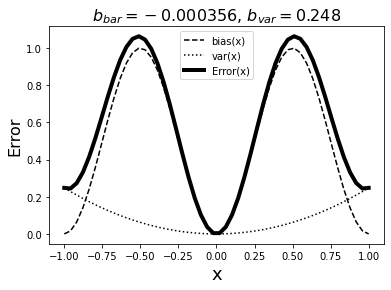

In [ ]:
xi= np.linspace(-1,1,50)
yi= np.sin(np.pi*xi)

plt.plot(xi,(b_bar*xi-yi)**2,'--k',label='bias(x)')
plt.plot(xi,(b_var)*(xi)**2,':k',label='var(x)')
plt.plot(xi,((b_bar*xi-yi)**2 + b_var*(xi)**2),'-k',lw = 4, label='Error(x)')
plt.legend(loc='best')
plt.xlabel('x', fontsize=18)
plt.ylabel('Error',fontsize=16)
plt.title('$b_{bar}=%3.3g$, $b_{var}=%3.3g$'%(b_bar,b_var),fontsize=16)

In [ ]:
# compute bias and variance
cnt = 100000
bias = 0
var = 0
x = np.random.uniform(-1, 2, size = cnt)
for i in range(cnt):
    bias += (b_bar*x[i] - np.sin(np.pi*x[i]))**2
    var += b_var * x[i] * x[i]
bias = bias / cnt # approx 2.84
var = var / cnt # approx 0.71
print(bias, var)

0.49942460063160693 0.24803233841011635


In [ ]:
import csv
def output_csv(bias, var):
  csv_file_name = student_id + '_p1.csv'
  with open(csv_file_name, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["bias", "variance"])
    writer.writerow([round(bias,4), round(var,4)])

In [ ]:
output_csv(bias, var)

In [ ]:
from sympy.solvers import solve
from sympy import symbols


#設定變數(將10個未知站點高程設定變數)
#根據x陣列依序排序
a,b,c,d,e,f,g,h,i,j = symbols("a b c d e f g h i j")



#權
w1 = 0.000664086458345733
w2 = 0.00439100530490085
w3 = 0.000272592268383060
w4 = 0.0000701006794489499
w5 = 0.000142465242121978
w6 = 0.000170393000741899
w7 = 0.000419089158462533
w8 = 0.0278706023673290
w9 = 0.000334471311654913
w10 = 0.000557825409125890
w11 = 0.000383549453330972
w12 = 0.000101502727076458

#解聯立
height = solve([2*w1*(-2413.37695+a)-2*w2*(-1431.385626+b-a),
       2*w2*(-1431.385626+b-a)-2*w3*(3811.328797+c-b),
       2*w3*(3811.328797+c-b)-2*w4*(-290.4595614+d-c),
       2*w4*(-290.4595614+d-c)+2*w5*(-301.6661312+d-e),
       -2*w5*(-301.6661312+d-e)-2*w6*(20.03238649+f-e)-2*w10*(14.22407699+i-e),
       2*w6*(20.03238649+f-e)-2*w7*(-38.47413871+g-f),
       2*w7*(-38.47413871+g-f)-2*w8*(32.70905608+h-g),
       2*w8*(32.70905608+h-g)-2*w9*(8.12736132-h)+2*w12*(0.936864416+h-j),
       2*w10*(14.22407699+i-e)-2*w11*(-0.873559392+j-i),
       2*w11*(-0.873559392+j-i)-2*w12*(0.936864416+h-j)])
height

{a: 2413.38448996370,
 b: 3844.77125629205,
 c: 33.4608280735286,
 d: 323.991817993943,
 e: 22.3608335268476,
 f: 2.34179827230461,
 g: 40.8213653190372,
 h: 8.11239086472454,
 i: 8.14165454022847,
 j: 9.02233747448904}